### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Understand the problem Statement

<br> Ouput: customer purchase behaviour (specifically, purchase amount) 
<br> Deciding features: various products of different categories.

# Exploratory Data Analysis

In [1]:
import pandas as pd
import missingno as msno
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot

In [2]:
#read dataset
dataset=pd.read_csv('https://raw.githubusercontent.com/blueconic/ai-workbench/master/blackfriday_train.csv')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
features = dataset.columns
dataset.shape

(550068, 12)

In [4]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Inference: 
1. There are features with missing values
2. There are both categorical and numerical values

### Detect Missing Features

<AxesSubplot:>

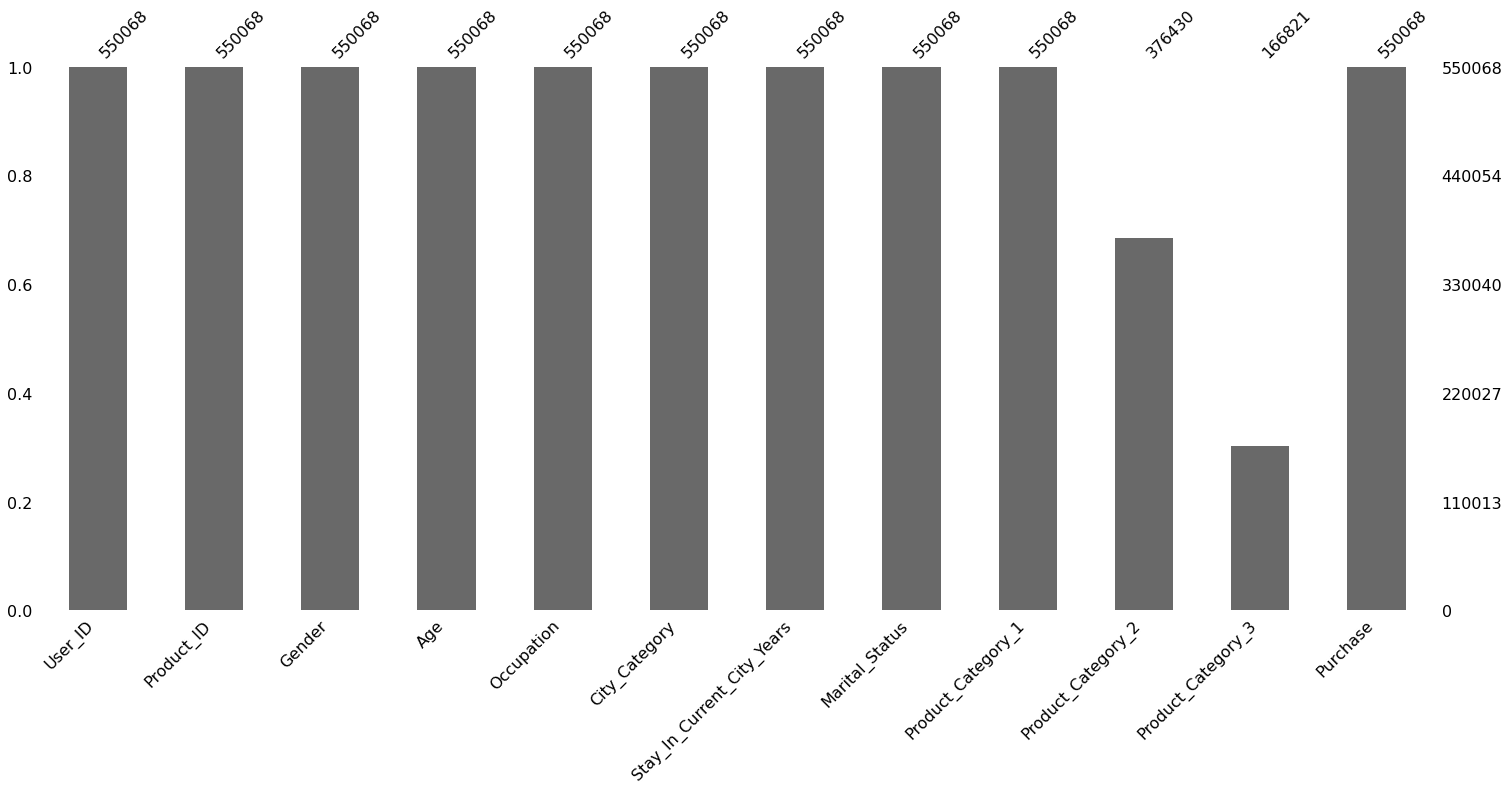

In [6]:
msno.bar(dataset)

Observation: It is evident that Product_Category_2 and Product_Category_3 is having missing values

Percentage of missing values

In [7]:
features_missing = []
for feature in features:
    missing_values = (dataset[feature].isnull().sum()/dataset.shape[0])* 100
    if missing_values>0:
        features_missing.append(feature)
    print(f"{feature:30} : {round(missing_values,2)}%")

User_ID                        : 0.0%
Product_ID                     : 0.0%
Gender                         : 0.0%
Age                            : 0.0%
Occupation                     : 0.0%
City_Category                  : 0.0%
Stay_In_Current_City_Years     : 0.0%
Marital_Status                 : 0.0%
Product_Category_1             : 0.0%
Product_Category_2             : 31.57%
Product_Category_3             : 69.67%
Purchase                       : 0.0%


### Seperate categorical and numerical features

In [8]:
features_numerical = [feature for feature in features if dataset[feature].dtype!='O']
features_numerical

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [9]:
features_categorical = [feature for feature in features if dataset[feature].dtype=='O']
features_categorical

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

### Uniqueness of feature

In [10]:
for feature in features:
    unique_values = dataset[feature].unique().size
    print(f"{feature:30} : {round(unique_values,2)}")

User_ID                        : 5891
Product_ID                     : 3631
Gender                         : 2
Age                            : 7
Occupation                     : 21
City_Category                  : 3
Stay_In_Current_City_Years     : 5
Marital_Status                 : 2
Product_Category_1             : 20
Product_Category_2             : 18
Product_Category_3             : 16
Purchase                       : 18105


All the features have different uniqueness, which means that none of the features can be dropped without analysing their dependency with the output.

<u> Analysis </u>
1. Product is categorised into product 1,2 and 3. so having seperate Product_ID  doesn't make sense.
2. User is defined based on age, coocupation and other things. so dropping user id also makes sense after getting specific informations.

In [11]:
dataset[['User_ID','Product_ID']].describe()

,User_ID
count,5.500680e+05
mean,1.003029e+06
std,1.727592e+03
min,1.000001e+06
25%,1.001516e+06
50%,1.003077e+06
75%,1.004478e+06
max,1.006040e+06


In [12]:
dataset['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005391       7
1002690       7
1002111       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [13]:
user_id_size = pd.DataFrame(dataset.groupby('User_ID').size())
user_id_size # Can be used for analysis later if required

,0
User_ID,
1000001,35
1000002,77
1000003,29
1000004,14
1000005,106
...,...
1006036,514
1006037,122
1006038,12


User: 1001680 has done maximum purchase & User: 1000708  has done minimum purchase

In [14]:
dataset.groupby('User_ID').size().agg(['max', 'min', 'std'])

max    1026.000000
min       6.000000
std     107.190049
dtype: float64

In [15]:
dataset['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00160742       1
P00206542       1
P00077242       1
P00062442       1
P00307042       1
Name: Product_ID, Length: 3631, dtype: int64

Product: 1880 is sold the most

In [16]:
product_id_size = pd.DataFrame(dataset.groupby('Product_ID').size())
product_id_size # Can be used for analysis later if required

,0
Product_ID,
P00000142,1152
P00000242,376
P00000342,244
P00000442,92
P00000542,149
...,...
P0099442,200
P0099642,13
P0099742,126


## PreProcessing

We can remove 'Product_ID' and 'User_ID' for time being.

In [17]:
latest_dataset = dataset.copy()
latest_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
latest_dataset.drop(columns=['User_ID','Product_ID'], inplace=True, axis=1 )
latest_dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Handling categorical data

In [19]:
##HAndling categorical feature Gender
latest_dataset['Gender']=latest_dataset['Gender'].map({'F':0,'M':1})
latest_dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [20]:
##HAndling categorical feature Age
dataset['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [21]:
latest_dataset['Age']=latest_dataset['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
latest_dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,NaN,NaN,1422
3,0,1,10,A,2,0,12,14.0,NaN,1057
4,1,7,16,C,4+,0,8,NaN,NaN,7969


In [22]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
latest_dataset['City_Category']= label_encoder.fit_transform(latest_dataset['City_Category'])
 
latest_dataset['City_Category'].unique()

array([0, 2, 1])

In [23]:
latest_dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,NaN,NaN,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,NaN,NaN,1422
3,0,1,10,0,2,0,12,14.0,NaN,1057
4,1,7,16,2,4+,0,8,NaN,NaN,7969


In [24]:
latest_dataset['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
latest_dataset['Stay_In_Current_City_Years']=latest_dataset['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-25-5273f04b558c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  latest_dataset['Stay_In_Current_City_Years']=latest_dataset['Stay_In_Current_City_Years'].str.replace('+','')


In [26]:
latest_dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,NaN,NaN,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,NaN,NaN,1422
3,0,1,10,0,2,0,12,14.0,NaN,1057
4,1,7,16,2,4,0,8,NaN,NaN,7969


In [27]:
latest_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int32  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 39.9+ MB


In [28]:
latest_dataset['Stay_In_Current_City_Years'].astype(int)

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int32

### Handling missing value

As of now, missing value wont be replaced, a new column will be added to see the effect of missing value on purchase and then it will be handled

In [29]:
latest_dataset['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
latest_dataset['Category2_Effect'] = latest_dataset['Product_Category_2'].fillna(100)

In [31]:
latest_dataset['Category2_Effect'].unique()

array([100.,   6.,  14.,   2.,   8.,  15.,  16.,  11.,   5.,   3.,   4.,
        12.,   9.,  10.,  17.,  13.,   7.,  18.])

In [32]:
latest_dataset['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [33]:
latest_dataset['Category3_Effect'] = latest_dataset['Product_Category_3'].fillna(100)

In [34]:
latest_dataset['Category3_Effect'].unique()

array([100.,  14.,  17.,   5.,   4.,  16.,  15.,   8.,   9.,  13.,   6.,
        12.,   3.,  18.,  11.,  10.])

### Analysis of data

In [35]:
latest_dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category2_Effect,Category3_Effect
0,0,1,10,0,2,0,3,NaN,NaN,8370,100.0,100.0
1,0,1,10,0,2,0,1,6.0,14.0,15200,6.0,14.0
2,0,1,10,0,2,0,12,NaN,NaN,1422,100.0,100.0
3,0,1,10,0,2,0,12,14.0,NaN,1057,14.0,100.0
4,1,7,16,2,4,0,8,NaN,NaN,7969,100.0,100.0


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

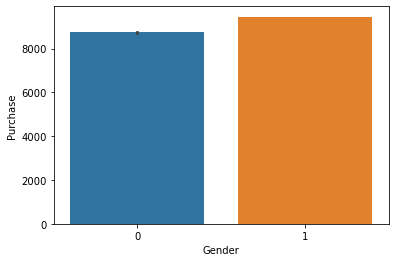

In [37]:
# effect of gender on data
sns.barplot(data = latest_dataset, x='Gender', y='Purchase')

Inference: Male is making more purchase than female

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

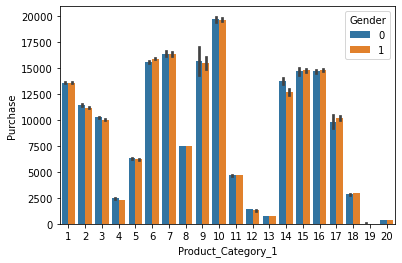

In [41]:
# effect of gender on product category
sns.barplot(data = latest_dataset, x='Product_Category_1', y='Purchase', hue='Gender')

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

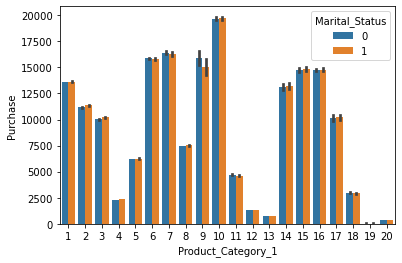

In [42]:
# effect of marital status on product category
sns.barplot(data = latest_dataset, x='Product_Category_1', y='Purchase', hue='Marital_Status')

Inference: There is no effect of marital status on purchase of category 1 

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

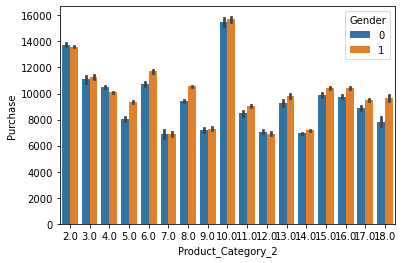

In [43]:
# effect of gender on product category
sns.barplot(data = latest_dataset, x='Product_Category_2', y='Purchase', hue='Gender')

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

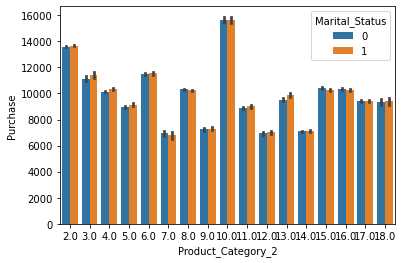

In [44]:
# effect of marital status on product category
sns.barplot(data = latest_dataset, x='Product_Category_2', y='Purchase', hue='Marital_Status')

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

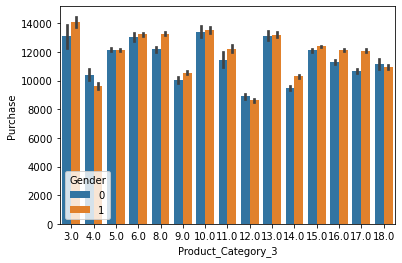

In [45]:
# effect of gender on product category
sns.barplot(data = latest_dataset, x='Product_Category_3', y='Purchase', hue='Gender')

In [ ]:
# effect of gender on product category
sns.barplot(data = latest_dataset, x='Product_Category_3', y='Purchase', hue='Gender')